#### Contents

##### 01 Import libraries and data
##### 02 Split data
##### 03 Run grid search optimization
##### 04 Run random forest classifier with new parameters
##### 05 Calculate Feature Importances

#### 01 Import libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
import random

2024-11-16 12:16:07.503500: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
path = r'/Users/Owner/Documents/CareerFoundry/Machine Learning Specialization/Data Sets'

In [4]:
df_obs = pd.read_csv(os.path.join(path, 'Observations_clean.csv'), index_col = False)

In [5]:
df_obs.head()

,DATE,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,...,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,...,4.1,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,19600104,3,0.92,1.018,0.58,0.00,4.1,6.3,3.8,10.6,...,2.3,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,19600105,6,0.95,1.018,0.65,0.14,5.4,3.0,-0.7,6.0,...,4.3,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4


In [6]:
df_pleasant = pd.read_csv(os.path.join(path, 'Pleasant_weather_cleaned.csv'), index_col = False)

In [7]:
df_pleasant.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
#Reduce observation dataset to a single station
# Create a dataframe containing only dusseldorf stations for observation set

heathrow_stations = df_obs.filter(like='HEATHROW', axis=1)

In [9]:
heathrow_stations.head()

,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max
0,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3
1,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6
2,8,0.96,1.0166,0.15,0.07,0.1,8.4,6.1,12.2
3,8,0.98,1.0230,0.13,0.00,0.0,9.4,6.7,8.9
4,5,0.84,1.0275,0.30,0.00,2.1,8.9,8.9,7.2


In [10]:
#Reduce pleasant weather dataset to a single station
# Create a dataframe containing only dusseldorf stations for pleasant weather

heathrow_pleasant = df_pleasant.filter(like='HEATHROW', axis=1)

In [11]:
heathrow_pleasant.head()

,HEATHROW_pleasant_weather
0,0
1,0
2,0
3,0
4,0


In [12]:
print(heathrow_stations.shape)

(22950, 9)


In [13]:
print(heathrow_pleasant.shape)

(22950, 1)


#### 02 Split data

In [15]:
X = heathrow_stations
y = heathrow_pleasant
print(X.shape)
print(y.shape)
X

(22950, 9)
(22950, 1)


,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max
0,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3
1,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6
2,8,0.96,1.0166,0.15,0.07,0.1,8.4,6.1,12.2
3,8,0.98,1.0230,0.13,0.00,0.0,9.4,6.7,8.9
4,5,0.84,1.0275,0.30,0.00,2.1,8.9,8.9,7.2
...,...,...,...,...,...,...,...,...,...
22945,5,0.87,1.0140,1.18,0.16,1.9,16.4,11.9,18.9
22946,4,0.82,1.0152,1.18,0.16,4.2,15.8,12.7,21.8
22947,7,0.85,1.0138,1.18,0.16,4.2,16.5,11.2,17.0
22948,5,0.86,1.0147,1.18,0.16,0.6,15.2,13.4,17.5


In [16]:
X = np.array(X)
y = np.array(y)

In [17]:
X.shape

(22950, 9)

In [18]:
y.shape

(22950, 1)

In [19]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

#### 03 Run grid search optimization

In [21]:
# creating a RF classifier
clf = RandomForestClassifier()

In [22]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
             'max_features':[15,50,100,125],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [24]:
start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-2)
model_grid = grid.fit(X_train, y_train.ravel())
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[CV 2/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.9s
[CV 2/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.8s
[CV 2/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=1.000 total time=   0.9s
[CV 2/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.8s
[CV

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-

Search took 5.22311159769694 minutes


In [26]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best GRID search score is: 1.0


In [28]:
#RANDOM SEARCH

In [78]:
# Random search cv
rs_space={'max_depth':list(np.arange(1, 30, step=2)) + [None], #adjusting based on grid search output
              'n_estimators':np.arange(2, 30, step=2), #adjusting based on grid search output
              'max_features':randint(10,30), #adjusting based on grid search output
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4), #adjusting based on grid search output
              'min_samples_split':np.arange(1, 10, step=2)
         }

In [80]:
# creating a RF classifier
clf2= RandomForestClassifier()

In [82]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-2, cv=3) #500
model_random = rf_random.fit(X_train, y_train.ravel())
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
171 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
171 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-p

Search took 0.40862903197606404 minutes


In [84]:
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 9, 'max_features': 18, 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 24}
Best RANDOM search score is: 1.0


In [86]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best GRID search score is: 1.0
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 9, 'max_features': 18, 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 24}
Best RANDOM search score is: 1.0


#### 04 Run random forest classifier with new parameters

In [90]:
# creating a RF classifier with the best results from above
clf3 = RandomForestClassifier(n_estimators = 24, max_depth=9, max_features=18, min_samples_leaf=1, min_samples_split=2, criterion = 'gini')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train.ravel())

RandomForestClassifier(max_depth=9, max_features=18, n_estimators=24)

In [92]:
# performing predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


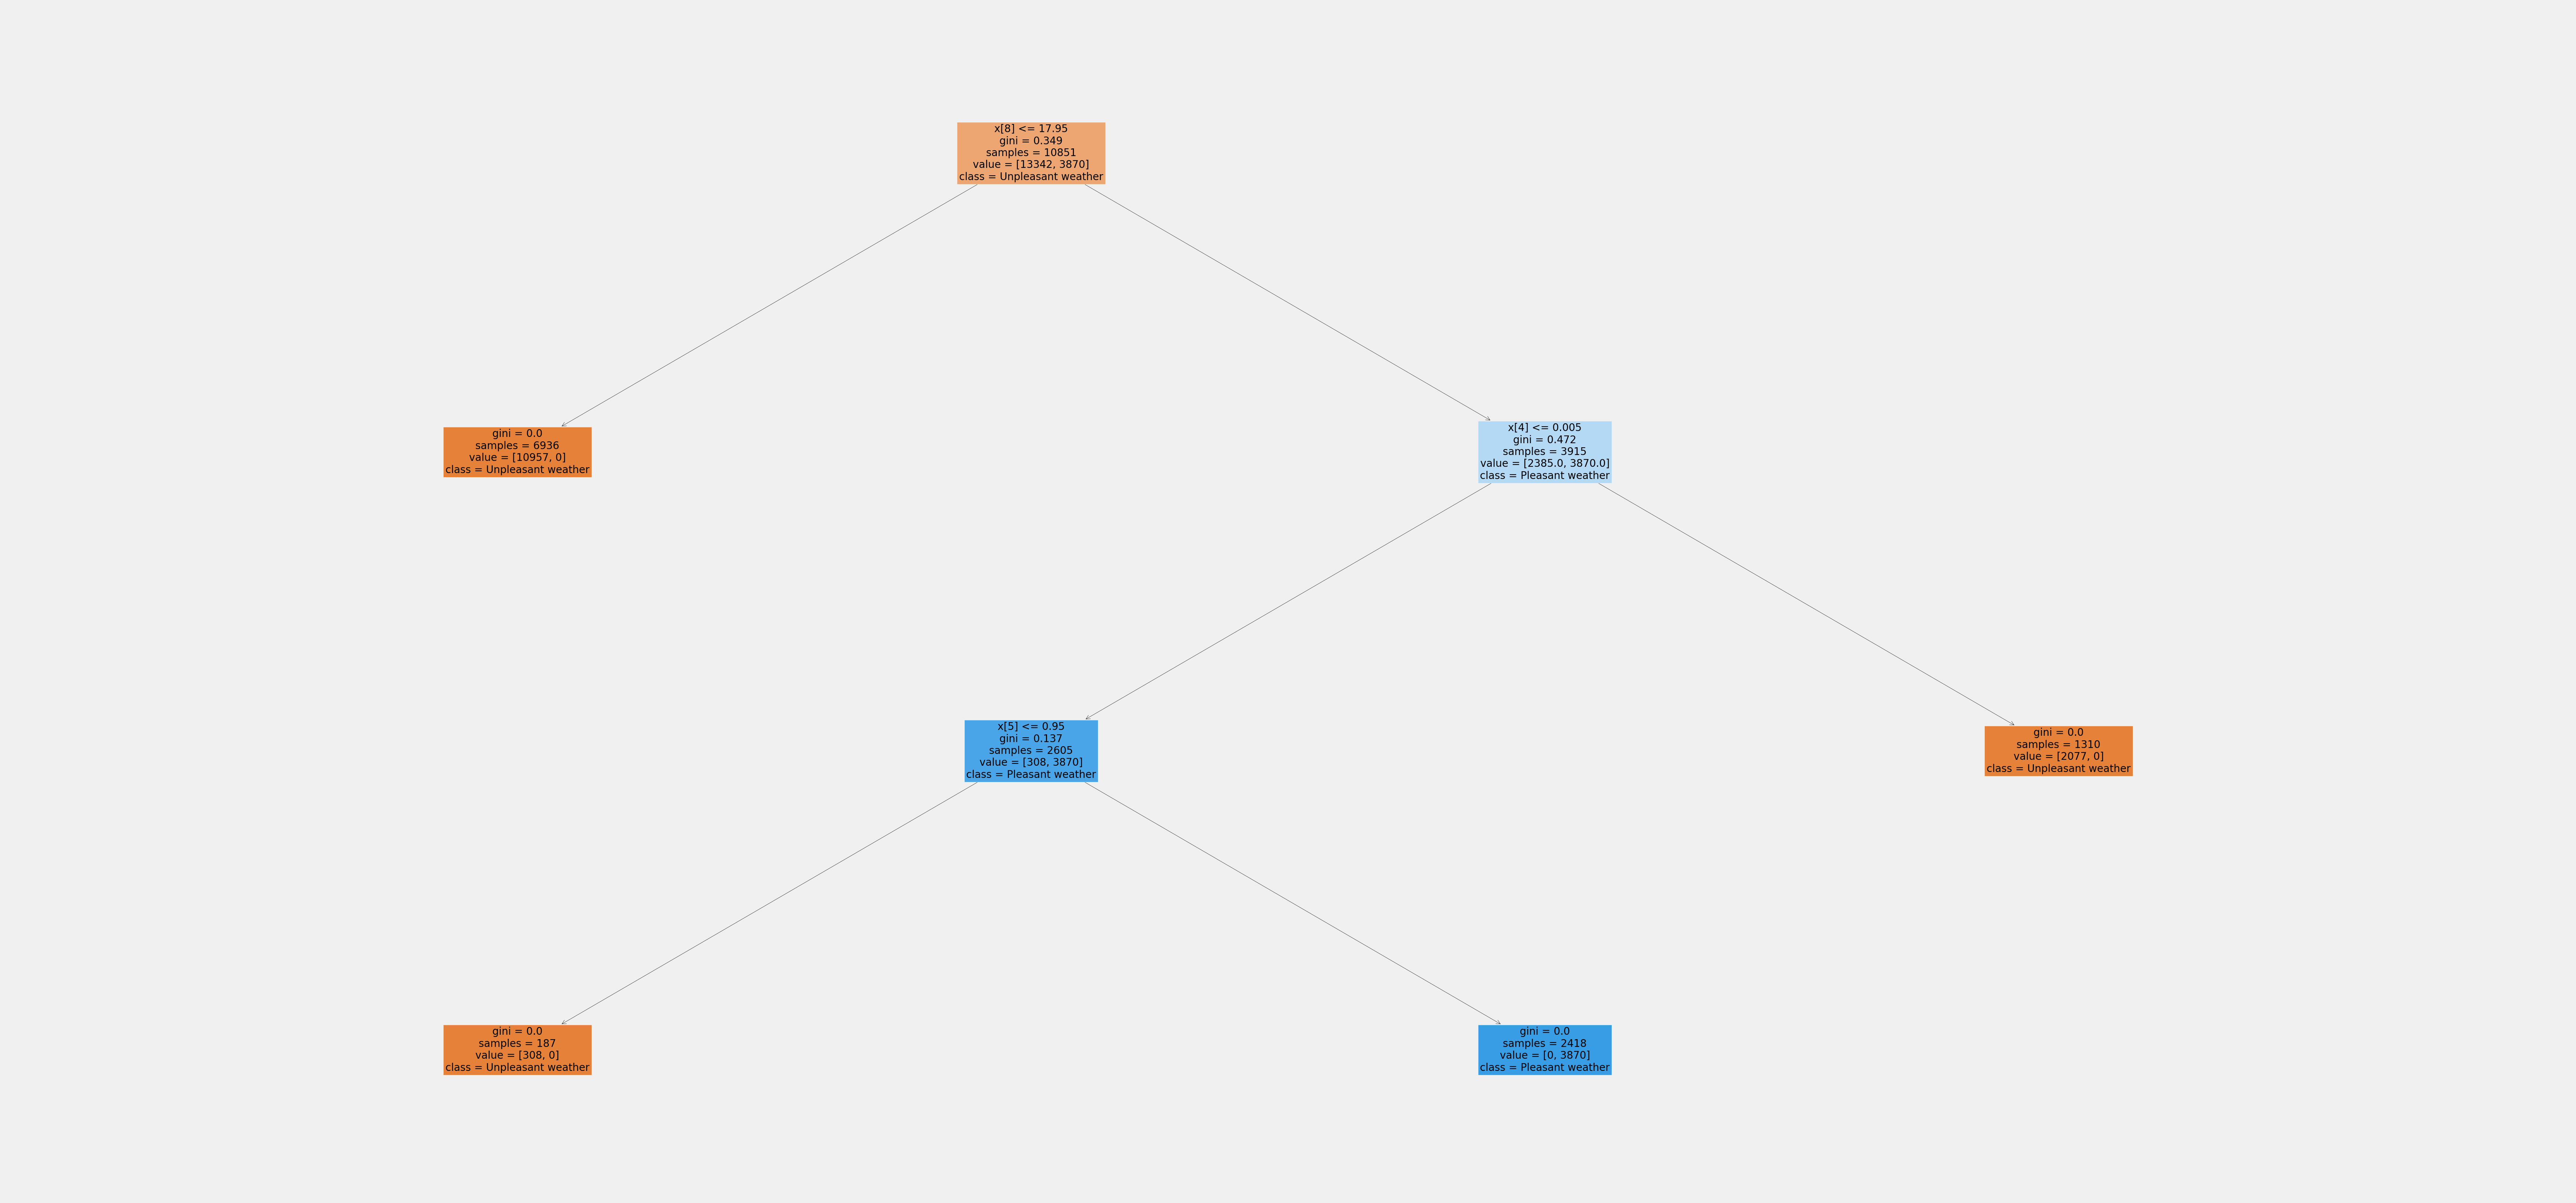

In [94]:
types = {0:'Unpleasant weather', 1:'Pleasant weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[15], fontsize = 20, class_names=types, filled=True);

In [96]:
fig.savefig(os.path.join(path,'optimized_random_forest_90s_heathrow.png'), bbox_inches='tight')

#### 05 Calculate Feature Importances

In [98]:
#determine feature importances

np.set_printoptions(threshold=np.inf)
newarray = clf3.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.        , 0.        , 0.        , 0.        , 0.39735122,
       0.0960625 , 0.        , 0.        , 0.50658628])

In [100]:
# create list of weather features
features = ['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [102]:
important = pd.Series(newarray, index = features) #.sort_values(ascending = False)
important

cloud_cover         0.000000
humidity            0.000000
pressure            0.000000
global_radiation    0.000000
precipitation       0.397351
sunshine            0.096062
temp_mean           0.000000
temp_min            0.000000
temp_max            0.506586
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


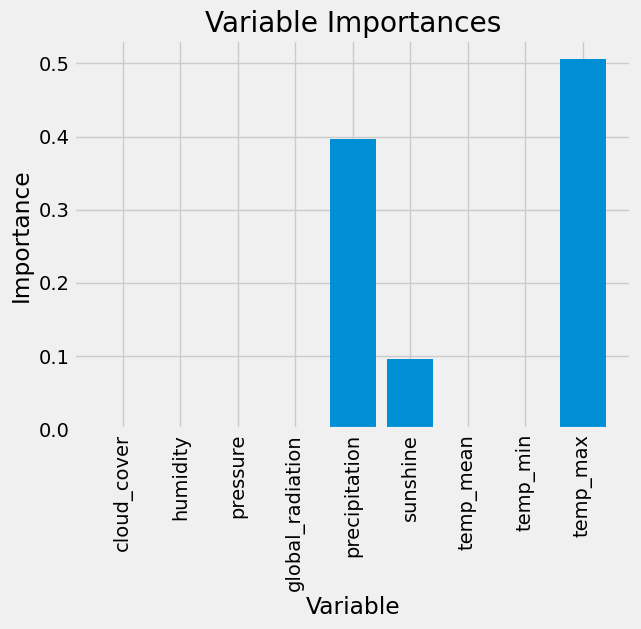

In [104]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(features)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, features, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');